### First part : only tests with microsoft API. It needs a valid key to work!

In [89]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "1e94ebc81f34468a9e9bea9bf04052cb"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the westcentralus region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
face_api_url = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'

# Set image_url to the URL of an image that you want to analyze.
image_url = 'https://st2.depositphotos.com/1001030/8501/i/950/depositphotos_85013712-stock-photo-people-with-different-emotions.jpg'

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,' +
    'emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}
data = {'url': image_url}
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()

# Display the original image and overlay it with the face information.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(12, 12))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]),
             fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

TypeError: string indices must be integers

In [ ]:
import operator

plt.clf()
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(15, 15))
ax = plt.imshow(image, alpha=0.6)
i = 0
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(
        origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1]+i, "%s, %s : %s"%(fa["gender"].capitalize(), fa["age"], max(fa["emotion"].items(), key=operator.itemgetter(1))[0]),
             fontsize=10, weight="bold", va="bottom")
    i+=0
_ = plt.axis("off")
plt.show()

In [ ]:
import numpy as np

mean = dict()
for emo in fa['emotion'].keys():
        mean[emo] =  0.0
        
for face in faces:
    
    for emo in fa['emotion'].keys():
        mean[emo] +=  fa['emotion'][emo]
    
    plt.figure(figsize=(8,4))
    print(fa['emotion'])
    fa = face["faceAttributes"]
    X = np.arange(len(list(fa['emotion'].keys())))
    
    fr = face["faceRectangle"]
    crop_rectangle = (fr["left"], fr["top"], fr["left"]+fr["width"], fr["top"]+fr["height"])
    plt.imshow(image.crop(crop_rectangle))
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.bar(X, fa['emotion'].values(), color='g')
    plt.xticks(X, fa['emotion'].keys())
    plt.show()

print(mean)

In [ ]:
factor=1.0/max(mean.values())
for k in mean:
  mean[k] = mean[k]*factor

plt.figure(figsize=(10,5))
plt.bar(X, mean.values(), color='g')
plt.xticks(X, mean.keys())
plt.show()


### Second part : Developpement of path generation (clean code in Path.py in the website)

In [ ]:
import scipy.misc

map1 = scipy.misc.imread("./map/pixel_floor1.jpg")

In [ ]:
import numpy as np

def makeAdjacency(map1):
    matrix = np.zeros((len(map1),len(map1[0])))
    adjacency = np.zeros((len(map1)*len(map1[0]),len(map1)*len(map1[0])))

    for i in range(0,len(map1)):
        for j in range(0,len(map1[i])):
            matrix[i][j]= int(int(round(map1[i][j][0]/30))*100+int(round(map1[i][j][1]/30))*10+int(round(map1[i][j][2]/30)))

    matLine = np.reshape(matrix, len(map1)*len(map1[i]))

    for i in range(0,len(adjacency)):
        #i_1 = (i-i%116)/116
        #i_2 = i%116
        if(matLine[i] >= 800 and matLine[i] < 870):
            if(i-1 >= 0 and i-1 < len(adjacency) and matLine[i-1] != 888 and matLine[i-1] >= 800 and matLine[i-1] < 870): 
                adjacency[i][i-1] = 1
            if(i+1 >= 0 and i+1 < len(adjacency) and matLine[i+1] != 888 and matLine[i+1] >= 800 and matLine[i+1] < 870): 
                adjacency[i][i+1] = 1
            if(i-len(map1[0]) >= 0 and i-len(map1[0]) < len(adjacency) and matLine[i-len(map1[0])] != 888 and matLine[i-len(map1[0])] >= 800 and matLine[i-len(map1[0])] < 870): 
                adjacency[i][i-len(map1[0])] = 1
            if(i+len(map1[0]) >= 0 and i+len(map1[0]) < len(adjacency) and matLine[i+len(map1[0])] != 888 and matLine[i+len(map1[0])] >= 800 and matLine[i+len(map1[0])] < 870): 
                adjacency[i][i+len(map1[0])] = 1
            #if(i-len(map1)+1 >= 0 and i-len(map1[0])+1 < len(adjacency) and matLine[i-len(map1[0])+1] != 888 and matLine[i-len(map1[0])+1] >= 800 and matLine[i-len(map1[0])+1] < 870): 
            #    adjacency[i][i-len(map1[0])+1] = 1
            #if(i+len(map1[0])+1 >= 0 and i+len(map1[0])+1 < len(adjacency) and matLine[i+len(map1[0])+1] != 888 and matLine[i+len(map1[0])+1] >= 800 and matLine[i+len(map1[0])+1] < 870): 
            #    adjacency[i][i+len(map1[0])+1] = 1
            #if(i-len(map1[0])-1 >= 0 and i-len(map1[0])-1 < len(adjacency) and matLine[i-len(map1[0])-1] != 888 and matLine[i-len(map1[0])-1] >= 800 and matLine[i-len(map1[0])-1] < 870): 
            #    adjacency[i][i-len(map1[0])-1] = 1
            #if(i+len(map1[0])-1 >= 0 and i+len(map1[0])-1 < len(adjacency) and matLine[i+len(map1[0])-1] != 888 and matLine[i+len(map1[0])-1] >= 800 and matLine[i+len(map1[0])-1] < 870): 
            #    adjacency[i][i+len(map1[0])-1] = 1

    return adjacency

adjacency = makeAdjacency(map1)

In [ ]:
import networkx as nx
#import matplotlib.pyplot as plt

entrance = (30,31)
G=nx.from_numpy_matrix(adjacency)
points = [(12,17),(12,14),(32,8),(33,1),(4,18),(25,22)]

In [ ]:
import bezier
from PIL import Image

def drawPath(map1, G, points):
    path = []
    for i in range(0,len(points)-1):
        path.append(nx.shortest_path(G,source=len(map1[0])*points[i][0]+points[i][1],target=len(map1[0])*points[i+1][0]+points[i+1][1]))


    paths_draw=[]
    for i in range(0,len(path)):
        paths_draw.append(np.reshape(map1[:,:,0], (len(map1)*len(map1[1]))))
        paths_draw[i][path[i]] = 150
        paths_draw[i] = np.reshape(paths_draw[i], (len(map1),len(map1[1])))

    plt.figure(figsize=(10,10))
    nodes = np.asfortranarray([
        [0.0],
        [0.0],
    ])
    curve = bezier.Curve(nodes, degree=2)
    ax =  curve.plot(num_pts=256)
    for i in range(0,len(path)):

        controlX= np.zeros(len(path[i]))
        controlY= np.zeros(len(path[i]))

        for j in range(0,len(path[i])):
            controlY[j] = len(map1)-path[i][j]/len(map1[0])
            controlX[j] = path[i][j]%len(map1[0])

        nodes = np.asfortranarray([
            controlX,
            controlY,
            ])
        curve = bezier.Curve(nodes, degree=2)
        normalizedCurve = curve.nodes
        normalizedCurve[0] = normalizedCurve[0]/len(map1[0])
        normalizedCurve[1] = normalizedCurve[1]/len(map1)

        #curves on same plot
        bezier.Curve(normalizedCurve, degree=10).plot(num_pts=256,ax=ax)

    plt.axis(xmin=0, ymin=0, xmax=1, ymax=1)
    ax.set_axis_off()
    plt.savefig("sexyPath.jpg",frameon=True,bbox_inches='tight')
    plt.show()
    
drawPath(map1,G,points)

In [ ]:
from resizeimage import resizeimage

def copyPath(source,target):
    mapResize = scipy.misc.imread(target,mode="RGB")
    bPath = scipy.misc.imread(source,mode="RGB")
    img = Image.fromarray(bPath)
    img = img.crop([32,12,365,228])
    img= img.resize((len(mapResize[0]), len(mapResize)), Image.ANTIALIAS)
    bPath = np.array(img)
    for i in range(0,len(bPath)):
        for j in range(0,len(bPath[0])):
            if bPath[i][j][0] <= 200 or bPath[i][j][1] < 200 or bPath[i][j][2] <= 200:
                mapResize[i][j] = bPath[i][j]
    Image.fromarray(mapResize).show()
    Image.fromarray(mapResize).save("example2.png")

In [ ]:
def path1(map1,points):
    G=nx.from_numpy_matrix(makeAdjacency(map1))
    drawPath(map1, G, points)
    copyPath("./sexyPath.jpg","./map/Elysee quello vero-Model-1.jpg")

def path2(map1,points):
    G=nx.from_numpy_matrix(makeAdjacency(map1))
    drawPath(map1, G, points)
    copyPath("./sexyPath.jpg","./map/Elysee quello vero2-1.jpg")
    
map1 = scipy.misc.imread("./map/pixel_floor1.jpg")
map2 = scipy.misc.imread("./map/pixel_floor2.jpg")
points1 = [(25,21),(12,17),(12,14),(32,8),(33,1),(4,18),(25,22)]
points2 = [(40,20),(20,12),(15,15),(4,15),(2,20),(4,25),(15,27),(20,29),(40,20)]
pointsAll1 = [(25,22),(23,26),(21,27),(17,27),(13,27),(10,25),(4,24),(2,21),(4,19),(12,17),(12,14),(10,12),(10,8),(10,4),(16,2),(28,2),(32,2),(35,4),(32,7),(28,7),(23,8),(23,13),(25,21)]
#path1(map1,pointsAll1)
#path2(map2,points2)


In [ ]:
import random
def randomEmo(seed=None):
    random.seed(seed)
    return [random.random(),random.random(),random.random(),random.random(),random.random(),random.random(),random.random(),random.random()]
emotions = dict()
emotions = dict({'disgust':0.0, 'fear':0.0, 'surprise':0.0, 'contempt':0.0, 'anger':0.0, 'neutral':.2, 'sadness':1, 'happiness':0.0})
emotions = [emotions['disgust'],emotions['fear'],emotions['surprise'],emotions['contempt'],emotions['anger'],emotions['neutral'],emotions['sadness'],emotions['happiness']]

In [ ]:
artifacts = []
artifacts.append(((32,2),randomEmo())) #pipes
artifacts.append(((28,2),randomEmo()))#Provisional wall
artifacts.append(((17,2),randomEmo())) #The laid-off workers
artifacts.append(((10,4),randomEmo())) #Open field
artifacts.append(((10,8),randomEmo())) #Unify the though to promote education
artifacts.append(((10,12),randomEmo())) #Voter registration is in accordance with the law
artifacts.append(((5,19),randomEmo())) #Chinese fan 3
artifacts.append(((2,21),randomEmo())) #8 Nine-dragon screen
artifacts.append(((13,14),randomEmo())) #Info port
artifacts.append(((10,25),randomEmo())) #Monastery
artifacts.append(((5,24),randomEmo())) #Chinese fan 2
artifacts.append(((12,27),randomEmo())) #United struggling
artifacts.append(((16,27),randomEmo())) #New culture needs more 
artifacts.append(((20,27),randomEmo())) #Suoja Village 2
artifacts.append(((10,18),randomEmo())) #Learn by figure
artifacts.append(((12,18),randomEmo())) #Head portrait (Mao)
artifacts.append(((15,18),randomEmo())) #In front of the party flag
artifacts.append(((23,25),randomEmo())) #Policeman and civilian 2
artifacts.append(((23,13),randomEmo())) #The inheritance
artifacts.append(((23,8),randomEmo())) #Info wall
artifacts.append(((28,7),randomEmo())) #Road block
artifacts.append(((32,7),randomEmo())) #Forklift
artifacts.append(((35,4),randomEmo())) #Creeping forward
artifacts.append(((23,8),randomEmo())) #Temple of heaven
artifacts.append(((17,8),randomEmo())) #Bird’s nest
artifacts.append(((9,7),randomEmo())) #Green food
artifacts.append(((4,15),randomEmo())) #Supermarket 3
artifacts.append(((2,20),randomEmo())) #Your world
artifacts.append(((4,25),randomEmo())) #Mobile phones
artifacts.append(((9,33),randomEmo())) #Panda
artifacts.append(((15,26),randomEmo())) #Screen in rest
artifacts.append(((17,33),randomEmo())) #Into the woods
artifacts.append(((20,29),randomEmo())) #Cancer village
artifacts.append(((23,33),randomEmo())) #The great wall
artifacts.append(((15,16),randomEmo())) #Water crisis
artifacts.append(((30,26),randomEmo())) #Cooperate with rero
artifacts.append(((20,12),randomEmo())) #Forest 2
artifacts1 = artifacts[:23]
artifacts2 = artifacts[23:]

In [ ]:
map1 = scipy.misc.imread("./map/pixel_floor1.jpg")
map2 = scipy.misc.imread("./map/pixel_floor2.jpg")
G1=nx.from_numpy_matrix(makeAdjacency(map1))
G2=nx.from_numpy_matrix(makeAdjacency(map2))
distances1 = [] #0 is the entrance
distances2 = [] #1 first artifact
entrance1 = (25,21)
entrance2 = (40,20)

def computeDistance(map1, artifacts, G, entrance):
    distances = []
    distance = []
    #entrance
    for i in artifacts:
        distance.append(1/nx.shortest_path_length(G,entrance[0]*len(map1[0])+entrance[1],i[0][0]*len(map1[0])+i[0][1]))
    distance = np.array(distance)/max(distance)
    distances.append(distance)
    
    for i in range(0,len(artifacts)):
        distance = []
        for j in range(0,len(artifacts)):
            if(i!=j):
                distance.append(1/nx.shortest_path_length(G,artifacts[i][0][0]*len(map1[0])+artifacts[i][0][1],artifacts[j][0][0]*len(map1[0])+artifacts[j][0][1]))
            else:
                distance.append(-1)
        distance = np.array(distance)/max(distance)
        distances.append(distance)
        
    return distances

distances1 = computeDistance(map1,artifacts1,G1,entrance1)
distances2 = computeDistance(map2,artifacts2,G2,entrance2)

In [ ]:
emo_score1 = []
for i in artifacts1:
    emo_score1.append(np.dot(np.array(emotions),np.array(i[1])))
    
emo_score2 = []
for i in artifacts2:
    emo_score2.append(np.dot(np.array(emotions),np.array(i[1])))
    
# WRONG TBD : advance and recompute at each step

#final_score1 = np.array((distances1[0]**20)*np.array(emo_score1))
#final_score2 = np.array(distances2[0]**20)*np.array(emo_score2)
#print(final_score1)

#final_indices1 = np.argsort(-final_score1) 
#final_indices2 = np.argsort(-final_score2)
#print(final_indices1)
#print(final_indices2)

def findNextHop(distance, emo_score, current, visited):
    final_score = np.array((distance)*np.array(emo_score))
    final_indices = np.argsort(-final_score)
    i=0
    while(final_indices[i] in visited or final_indices[i]==current): 
        i+=1
    
    return final_indices[i]

final_indices1 = []
max_hops = 8

current=-1
for i in range(max_hops):
    nextHop = findNextHop(distances1[current+1],emo_score1,current,final_indices1)
    print(nextHop)
    final_indices1.append(nextHop)
    current = nextHop

final_indices2 = []
current=-1
for i in range(max_hops):
    nextHop = findNextHop(distances2[current+1],emo_score2,current,final_indices2)
    print(nextHop)
    final_indices2.append(nextHop)
    current = nextHop

In [ ]:
pointsFinal1 = [entrance1]
pointsFinal2 = [entrance2]

for i in final_indices1:
    if(i<len(artifacts1)):
        pointsFinal1.append(artifacts1[i][0])
pointsFinal1.append(entrance1)
    
for i in final_indices2:
    if(i<len(artifacts2)):
        pointsFinal2.append(artifacts2[i][0])
pointsFinal2.append(entrance2)

In [ ]:
#Generate!
map1 = scipy.misc.imread("./map/pixel_floor1.jpg")
map2 = scipy.misc.imread("./map/pixel_floor2.jpg")
#path1(map1,pointsFinal1)
path2(map2,pointsFinal2)

In [ ]:
import scipy.misc
import numpy as np
import networkx as nx
import bezier
import matplotlib.pyplot as plt
from PIL import Image
from resizeimage import resizeimage
import random

def makeAdjacency(map1):
    matrix = np.zeros((len(map1),len(map1[0])))
    adjacency = np.zeros((len(map1)*len(map1[0]),len(map1)*len(map1[0])))

    for i in range(0,len(map1)):
        for j in range(0,len(map1[i])):
            matrix[i][j]= int(int(round(map1[i][j][0]/30))*100+int(round(map1[i][j][1]/30))*10+int(round(map1[i][j][2]/30)))

    matLine = np.reshape(matrix, len(map1)*len(map1[i]))

    for i in range(0,len(adjacency)):
        #i_1 = (i-i%116)/116
        #i_2 = i%116
        if(matLine[i] >= 800 and matLine[i] < 870):
            if(i-1 >= 0 and i-1 < len(adjacency) and matLine[i-1] != 888 and matLine[i-1] >= 800 and matLine[i-1] < 870):
                adjacency[i][i-1] = 1
            if(i+1 >= 0 and i+1 < len(adjacency) and matLine[i+1] != 888 and matLine[i+1] >= 800 and matLine[i+1] < 870):
                adjacency[i][i+1] = 1
            if(i-len(map1[0]) >= 0 and i-len(map1[0]) < len(adjacency) and matLine[i-len(map1[0])] != 888 and matLine[i-len(map1[0])] >= 800 and matLine[i-len(map1[0])] < 870):
                adjacency[i][i-len(map1[0])] = 1
            if(i+len(map1[0]) >= 0 and i+len(map1[0]) < len(adjacency) and matLine[i+len(map1[0])] != 888 and matLine[i+len(map1[0])] >= 800 and matLine[i+len(map1[0])] < 870):
                adjacency[i][i+len(map1[0])] = 1

    return adjacency

def drawPath(map1, G, points):
    path = []
    for i in range(0,len(points)-1):
        path.append(nx.shortest_path(G,source=len(map1[0])*points[i][0]+points[i][1],target=len(map1[0])*points[i+1][0]+points[i+1][1]))


    paths_draw=[]
    for i in range(0,len(path)):
        paths_draw.append(np.reshape(map1[:,:,0], (len(map1)*len(map1[1]))))
        paths_draw[i][path[i]] = 150
        paths_draw[i] = np.reshape(paths_draw[i], (len(map1),len(map1[1])))

    plt.figure(figsize=(10,10))
    nodes = np.asfortranarray([
        [0.0],
        [0.0],
    ])
    curve = bezier.Curve(nodes, degree=2)
    ax =  curve.plot(num_pts=256)
    for i in range(0,len(path)):

        controlX= np.zeros(len(path[i]))
        controlY= np.zeros(len(path[i]))

        for j in range(0,len(path[i])):
            controlY[j] = len(map1)-path[i][j]/len(map1[0])
            controlX[j] = path[i][j]%len(map1[0])

        nodes = np.asfortranarray([
            controlX,
            controlY,
            ])
        curve = bezier.Curve(nodes, degree=2)
        normalizedCurve = curve.nodes
        normalizedCurve[0] = normalizedCurve[0]/len(map1[0])
        normalizedCurve[1] = normalizedCurve[1]/len(map1)

        #curves on same plot
        bezier.Curve(normalizedCurve, degree=10).plot(num_pts=256,ax=ax)

    plt.axis(xmin=0, ymin=0, xmax=1, ymax=1)
    ax.set_axis_off()
    plt.savefig("sexyPath.jpg",frameon=True,bbox_inches='tight')

def copyPath(source,target):
    mapResize = scipy.misc.imread(target,mode="RGB")
    bPath = scipy.misc.imread(source,mode="RGB")
    img = Image.fromarray(bPath)
    img = img.crop([32,12,365,228])
    img= img.resize((len(mapResize[0]), len(mapResize)), Image.ANTIALIAS)
    bPath = np.array(img)
    for i in range(0,len(bPath)):
        for j in range(0,len(bPath[0])):
            if bPath[i][j][0] <= 200 or bPath[i][j][1] < 200 or bPath[i][j][2] <= 200:
                mapResize[i][j] = bPath[i][j]
    Image.fromarray(mapResize).show()
    Image.fromarray(mapResize).save("path.png")

def path1(map1,points):
    G=nx.from_numpy_matrix(makeAdjacency(map1))
    drawPath(map1, G, points)
    copyPath("./sexyPath.jpg","./map/Elysee quello vero-Model-1.jpg")

def path2(map1,points):
    G=nx.from_numpy_matrix(makeAdjacency(map1))
    drawPath(map1, G, points)
    copyPath("./sexyPath.jpg","./map/Elysee quello vero2-1.jpg")

def randomEmo(seed=None):
    random.seed(seed)
    return [random.random(),random.random(),random.random(),random.random(),random.random(),random.random(),random.random(),random.random()]

#Create distance and emotion arrays for each floor

def EmoDist(emotions):
    emotions = dict({'disgust':emotions[2], 'fear':emotions[1], 'surprise':emotions[6], 'contempt':emotions[3], 'anger':emotions[0], 'neutral':0.0, 'sadness':emotions[5], 'happiness':emotions[4]})
    emotions = [emotions['disgust'],emotions['fear'],emotions['surprise'],emotions['contempt'],emotions['anger'],emotions['neutral'],emotions['sadness'],emotions['happiness']]

    artifacts = []
    artifacts.append(((32,2),randomEmo())) #pipes
    artifacts.append(((28,2),randomEmo()))#Provisional wall
    artifacts.append(((17,2),randomEmo())) #The laid-off workers
    artifacts.append(((10,4),randomEmo())) #Open field
    artifacts.append(((10,8),randomEmo())) #Unify the though to promote education
    artifacts.append(((10,12),randomEmo())) #Voter registration is in accordance with the law
    artifacts.append(((5,19),randomEmo())) #Chinese fan 3
    artifacts.append(((2,21),randomEmo())) #8 Nine-dragon screen
    artifacts.append(((13,12),randomEmo())) #Info port
    artifacts.append(((10,25),randomEmo())) #Monastery
    artifacts.append(((5,24),randomEmo())) #Chinese fan 2
    artifacts.append(((12,27),randomEmo())) #United struggling
    artifacts.append(((16,27),randomEmo())) #New culture needs more
    artifacts.append(((20,27),randomEmo())) #Suoja Village 2
    artifacts.append(((10,18),randomEmo())) #Learn by figure
    artifacts.append(((12,18),randomEmo())) #Head portrait (Mao)
    artifacts.append(((15,18),randomEmo())) #In front of the party flag
    artifacts.append(((23,25),randomEmo())) #Policeman and civilian 2
    artifacts.append(((23,13),randomEmo())) #The inheritance
    artifacts.append(((23,8),randomEmo())) #Info wall
    artifacts.append(((28,7),randomEmo())) #Road block
    artifacts.append(((32,7),randomEmo())) #Forklift
    artifacts.append(((35,4),randomEmo())) #Creeping forward
    artifacts.append(((23,8),randomEmo())) #Temple of heaven
    artifacts.append(((17,8),randomEmo())) #Bird’s nest
    artifacts.append(((9,7),randomEmo())) #Green food
    artifacts.append(((4,15),randomEmo())) #Supermarket 3
    artifacts.append(((2,20),randomEmo())) #Your world
    artifacts.append(((4,25),randomEmo())) #Mobile phones
    artifacts.append(((9,33),randomEmo())) #Panda
    artifacts.append(((15,26),randomEmo())) #Screen in rest
    artifacts.append(((17,33),randomEmo())) #Into the woods
    artifacts.append(((20,29),randomEmo())) #Cancer village
    artifacts.append(((23,33),randomEmo())) #The great wall
    artifacts.append(((15,16),randomEmo())) #Water crisis
    artifacts.append(((30,26),randomEmo())) #Cooperate with rero
    artifacts.append(((20,12),randomEmo())) #Forest 2
    artifacts1 = artifacts[:23]
    artifacts2 = artifacts[23:]

    map1 = scipy.misc.imread("./map/pixel_floor1.jpg")
    map2 = scipy.misc.imread("./map/pixel_floor2.jpg")
    G1=nx.from_numpy_matrix(makeAdjacency(map1))
    G2=nx.from_numpy_matrix(makeAdjacency(map2))
    distances1 = [] #0 is the entrance
    distances2 = [] #1 first artifact
    entrance1 = (25,21)
    entrance2 = (40,20)

    def computeDistance(map1, artifacts, G, entrance):
        distances = []
        distance = []
        #entrance
        for i in artifacts:
            distance.append(1/nx.shortest_path_length(G,entrance[0]*len(map1[0])+entrance[1],i[0][0]*len(map1[0])+i[0][1]))
        distance = np.array(distance)/max(distance)
        distances.append(distance)

        for i in range(0,len(artifacts)):
            distance = []
            for j in range(0,len(artifacts)):
                if(i!=j):
                    distance.append(1/nx.shortest_path_length(G,artifacts[i][0][0]*len(map1[0])+artifacts[i][0][1],artifacts[j][0][0]*len(map1[0])+artifacts[j][0][1]))
                else:
                    distance.append(-1)
            distance = np.array(distance)/max(distance)
            distances.append(distance)

        return distances

    distances1 = computeDistance(map1,artifacts1,G1,entrance1)
    distances2 = computeDistance(map2,artifacts2,G2,entrance2)

    emo_score1 = []
    for i in artifacts1:
        emo_score1.append(np.dot(np.array(emotions),np.array(i[1])))

    emo_score2 = []
    for i in artifacts2:
        emo_score2.append(np.dot(np.array(emotions),np.array(i[1])))


    def findNextHop(distance, emo_score, current, visited):
        print(distance)
        print(len(distance))
        final_score = np.array((distance)*np.array(emo_score))
        final_indices = np.argsort(-final_score)
        i=0
        while(final_indices[i] in visited or final_indices[i]==current):
            i+=1

        return final_indices[i]

    final_indices1 = []
    max_hops = 18
    print(len(distances1))
    current=-1
    for i in range(max_hops):
        nextHop = findNextHop(distances1[current+1],emo_score1,current,final_indices1)
        final_indices1.append(nextHop)
        current = nextHop

    final_indices2 = []
    current=-1
    for i in range(max_hops):
        nextHop = findNextHop(distances2[current+1],emo_score2,current,final_indices2)
        final_indices2.append(nextHop)
        current = nextHop

    pointsFinal1 = [entrance1]
    pointsFinal2 = [entrance2]

    for i in final_indices1:
        if(i<len(artifacts1)):
            pointsFinal1.append(artifacts1[i][0])
    pointsFinal1.append(entrance1)

    for i in final_indices2:
        if(i<len(artifacts2)):
            pointsFinal2.append(artifacts2[i][0])
    pointsFinal2.append(entrance2)
    path1(map1,pointsFinal1)
EmoDist([.2,.2,.2,.2,.2,.2,.2])

### Third part : PCA with people and pictures

In [217]:
import json
from pprint import pprint
import numpy as np

#First experiment results
with open('database1.json') as f:
    data = json.load(f)

persons = []
for j in range(len(data[0]['res'])):
    person = [0,0,0,0,0,0,0,0]
    for i in data:
        if(i['floor']!=0):
            person[0] += i['res'][j][0]
            person[1] += i['res'][j][1]
            person[2] += i['res'][j][2]
            person[3] += i['res'][j][3]
            person[4] += i['res'][j][4]
            person[5] += i['res'][j][5]*.01
            person[6] += i['res'][j][6]
            person[7] += i['res'][j][7]
    for i in range(len(person)): person[i]=np.log(person[i]+1)
    persons.append(np.array(person)/(len(data)-1))

In [215]:
#Painting scores extraction from initial experiment
paintScore = []
for i in data:
    if i['floor']==1 or i['floor']==2:
        score=[0,0,0,0,0,0,0,0]
        for j in i['res']:
            score[0] += j[0]
            score[1] += j[1]
            score[2] += j[2]
            score[3] += j[3]
            score[4] += j[4]
            score[5] += j[5]
            score[6] += j[6]
            score[7] += j[7]
        for j in range(len(score)): score[j]=np.log(score[j]/len(i['res'])+1)
        paintScore.append((np.array(score)))        

In [216]:
import pandas as pd
import numpy as np

#Import Database into dataframe
df = pd.read_json("./experienceSkander.json")
df=df.dropna(subset=['person'])
people = df[['anger','contempt','disgust','fear','happiness','neutral','sadness','surprise','person']].groupby('person').agg(np.mean)
secondPass=list(people.values)
for i in secondPass:
    persons.append(i)
stuff= df[['anger','contempt','disgust','fear','happiness','neutral','sadness','surprise','name']].groupby('name').agg(np.mean)

#PCA with trusted people's data
pca2 = PCA(n_components=2)
peopleTrust= []
peopleTrust.append(people.values[0])
peopleTrust.append(people.values[1])
peopleTrust.append(people.values[2])
peopleTrust.append(people.values[3])
peopleTrust.append(people.values[4])
peopleTrust.append(people.values[52])
peopleTrust.append(people.values[53])
peopleTrust.append(people.values[23])
peopleTrust.append(people.values[92])

#Taking log of emotions values
paintsNew=np.copy(stuff.values)
for i in range(len(peopleTrust)):
    for j in range(len(peopleTrust[0])):
        peopleTrust[i][j] = np.log(peopleTrust[i][j]+1)
for i in range(len(paintsNew)):
    for j in range(len(paintsNew[0])):
        paintsNew[i][j] = np.log(paintsNew[i][j]+1)
principalComponents2 = pca2.fit_transform(list(peopleTrust)+list(paintScore))

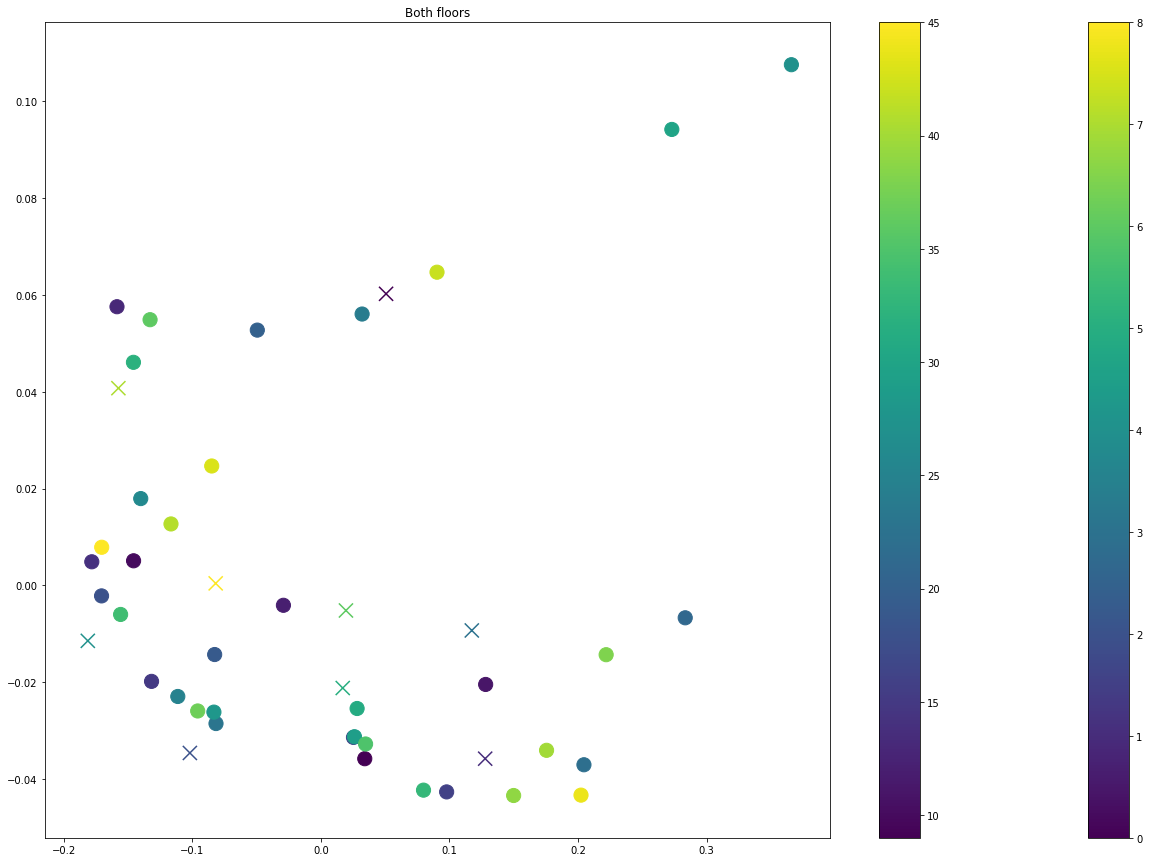

In [210]:
#Plot pca results for both floors
plt.figure(figsize=(22, 15))
colors = []
for i in range(len(principalComponents2)):
    colors.append([principalComponents2[i][0], principalComponents2[i][1], i])
    
plt.scatter(principalComponents2[:len(peopleTrust),0],principalComponents2[:len(peopleTrust),1],c=np.array(colors)[:len(peopleTrust),2], marker='x',s=200)
plt.colorbar()
plt.scatter(principalComponents2[len(peopleTrust):,0],principalComponents2[len(peopleTrust):,1],c=np.array(colors)[len(peopleTrust):,2], marker='o',s=200)
plt.colorbar()
plt.savefig("PCAboth.jpg",frameon=True,bbox_inches='tight')
plt.title('Both floors')
plt.show()

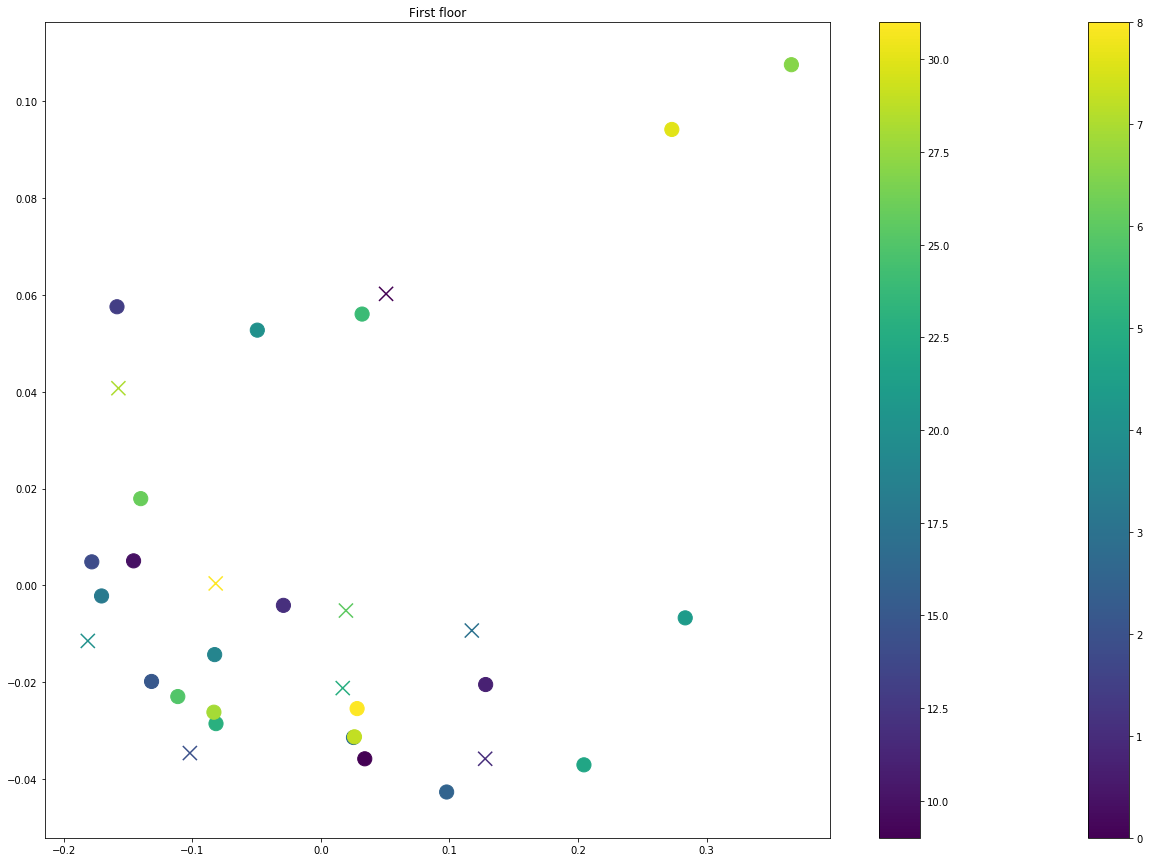

In [211]:
#Plot pca results for first floors
plt.figure(figsize=(22, 15))
colors = []
for i in range(len(principalComponents2)):
    colors.append([principalComponents2[i][0], principalComponents2[i][1], i])
    
plt.scatter(principalComponents2[:len(peopleTrust),0],principalComponents2[:len(peopleTrust),1],c=np.array(colors)[:len(peopleTrust),2], marker='x',s=200)
plt.colorbar()
plt.scatter(principalComponents2[len(peopleTrust):len(peopleTrust)+23,0],principalComponents2[len(peopleTrust):len(peopleTrust)+23,1],c=np.array(colors)[len(peopleTrust):len(peopleTrust)+23,2], marker='o',s=200)
plt.colorbar()
plt.savefig("PCAboth.jpg",frameon=True,bbox_inches='tight')
plt.title('First floor')
plt.show()

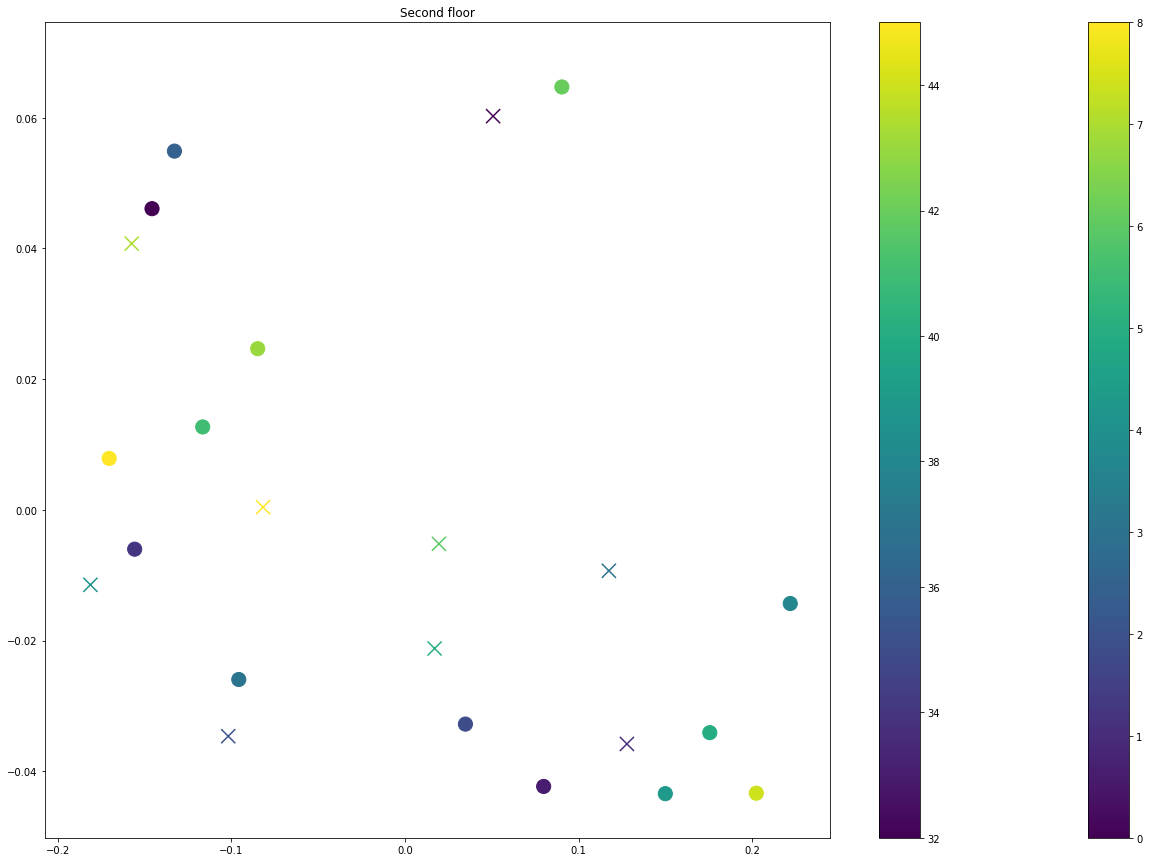

In [212]:
#Plot pca results for second floors
plt.figure(figsize=(22, 15))
colors = []
for i in range(len(principalComponents2)):
    colors.append([principalComponents2[i][0], principalComponents2[i][1], i])
    
plt.scatter(principalComponents2[:len(peopleTrust),0],principalComponents2[:len(peopleTrust),1],c=np.array(colors)[:len(peopleTrust),2], marker='x',s=200)
plt.colorbar()
plt.scatter(principalComponents2[len(peopleTrust)+23:,0],principalComponents2[len(peopleTrust)+23:,1],c=np.array(colors)[len(peopleTrust)+23:,2], marker='o',s=200)
plt.colorbar()
plt.savefig("PCAboth.jpg",frameon=True,bbox_inches='tight')
plt.title('Second floor')
plt.show()

In [200]:
for i in (principalComponents2*10):
    print(float(i[0]),float(i[1]))

0.50716426722156 0.6024421482974964
1.2776981172038628 -0.35794167579093045
-1.0183236288162973 -0.3461447478642388
1.1737825392311598 -0.09306769562738446
-1.8119257269591225 -0.11450678852214428
0.17019959801251247 -0.2119626501802203
0.1950689095538337 -0.051786449168469216
-1.5741620274711159 0.4074805949779142
-0.8177513725668815 0.004211926923908571
0.34143512683853194 -0.358025256115337
-1.4561844400809494 0.05086837369292507
1.2813860633616838 -0.20460672001631447
-0.2910101576878578 -0.04106535005719632
-1.5851229361780017 0.575765752579525
-1.7810103637343722 0.04881789550685619
-1.3164237184406153 -0.1982561238433547
0.9781125922834809 -0.42661579925568416
0.2536767703157692 -0.3140224416538375
-1.7051721723570987 -0.021657370665358167
-0.8256915445170503 -0.14278948959859983
-0.49405670104008836 0.5274552730860153
2.8331240158059865 -0.06691112170178612
2.0456697660969994 -0.37051934347620274
-0.8152559605898263 -0.28536070242442846
0.32078350410191075 0.5606710226497273
-1